In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from math import pi
plt.rc('text', usetex=True)

# VERLHUST

In [2]:
K, r = 10, 1
def verlhust(y0, t=0):
    y = K / (1+np.exp(-r*t)*(K/y0-1))
    return y

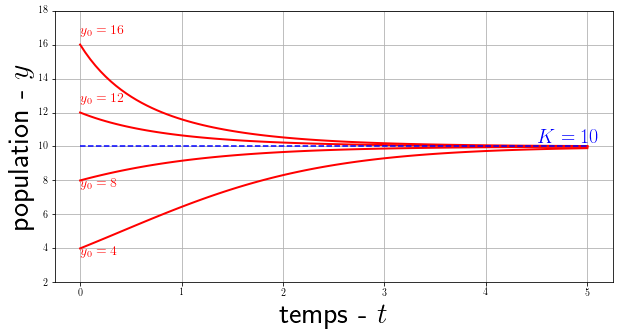

In [3]:
t = np.linspace(0, 5, 100)
Y0s = [4,8,12,16]
# trajectories for 5 initials conditions
plt.figure(figsize=(10,5))
for Y0 in Y0s:
    Y = verlhust(Y0, t)
    plt.plot(t, Y, "r", linewidth=2)
    offset = -0.5 if Y0 < K else 0.5
    plt.text(0, Y0+offset,"$y_0="+str(Y0)+"$", color="r", fontsize=14)
plt.plot(t, K*np.ones(len(t)), "--b", linewidth=1.5)
plt.text(4.5, 10.2,"$K=10$", color="b", fontsize=20)
plt.xlabel('temps - $t$', fontsize=30)
plt.ylabel('population - $y$', fontsize=30)
plt.grid()
plt.gca().set_ylim([2,18])
plt.show()

# LOTKA VOLTERRA

## prey-predators

In [4]:
# define ODE to resolve
r, c, m, b = 3, 4, 1, 2
def prey_predators(XY, t=0):
    dX = r*XY[0] - c*XY[0]*XY[1]
    dY = b*XY[0]*XY[1] - m*XY[1]
    return [dX, dY]

In [5]:
# discretization
T0   = 0
Tmax = 12
n    = 200
T    = np.linspace(T0, Tmax, n) 

In [6]:
# TEMPORAL DYNAMIC
X0 = [1,1]
solution = integrate.odeint(prey_predators, X0, T) # use scipy solver

In [7]:
# PHASES SPACE
# some trajectories
orbits = []
for i in range(5):
    X0 = [0.2+i*0.1, 0.2+i*0.1]
    orbits.append(integrate.odeint(prey_predators, X0, T)) 
# vector field
x, y             = np.linspace(0, 2.5, 20), np.linspace(0, 2, 20)
X_grid, Y_grid   = np.meshgrid(x, y)                      
DX_grid, DY_grid = prey_predators([X_grid, Y_grid])
N                = np.sqrt(DX_grid ** 2 + DY_grid ** 2) 
N[N==0]          = 1
DX_grid, DY_grid = DX_grid/N, DY_grid/N

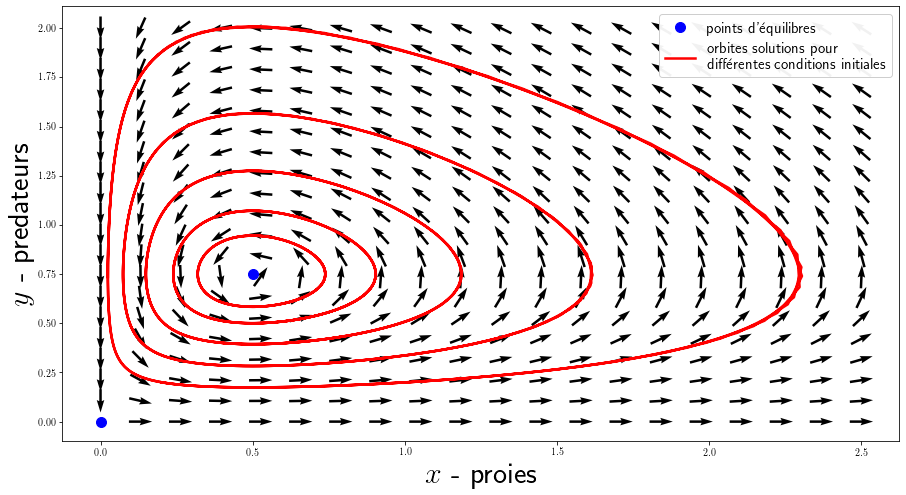

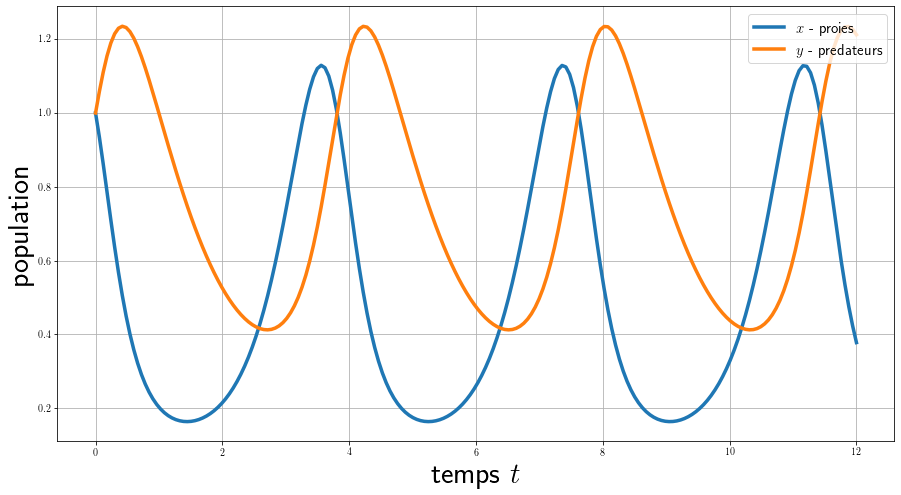

In [8]:
# PHASES SPACE
plt.figure(figsize=(15,8))
plt.quiver(X_grid, Y_grid, DX_grid, DY_grid, pivot='middle')
plt.plot(m/b, r/c, 'ob', markersize=10, label='points d\'équilibres')
plt.plot(0, 0, 'ob', markersize=10)
[plt.plot(s[:,0], s[:,1], "r", linewidth=2.5) for s in orbits]
plt.gca().lines[-1].set_label('orbites solutions pour \n différentes conditions initiales')
plt.xlabel('$x$ - proies', fontsize=30), plt.ylabel('$y$ - predateurs', fontsize=30)
plt.legend(fontsize=15, loc='upper right', framealpha=0.95)
plt.show()
# TEMPORAL DYNAMIC
plt.figure(figsize=(15,8))
plt.plot(T, solution[:,0], label='$x$ - proies', linewidth=3.5)
plt.plot(T, solution[:,1], label='$y$ - predateurs', linewidth=3.5)
plt.grid(), plt.legend(fontsize=15, loc='upper right')
plt.xlabel('temps $t$', fontsize=30), plt.ylabel('population', fontsize=30)
plt.show()

## competition

In [9]:
# define ODE to resolve
r1, K1 = 3, 1
r2, K2 = 3, 1
def competition(X1X2, a1, a2):
    dX1 = r1*X1X2[0] * (1-(X1X2[0]+a1*X1X2[1])/K1)
    dX2 = r2*X1X2[1] * (1-(X1X2[1]+a2*X1X2[0])/K2)
    return [dX1, dX2]

In [11]:
# PHASES SPACE
N = 20
x, y = np.linspace(0, 2.5, N), np.linspace(0, 2, N)
X_grid, Y_grid = np.meshgrid(x, y)
DX_grid, DY_grid = np.zeros((4,N,N)), np.zeros((4,N,N))
norm = np.zeros((4,N,N))
coeffs = np.array([[1.5,1.5],[0.5,0.5],[1.5,0.5],[0.5,1.5]])
for k,(a1,a2) in enumerate(coeffs):
    DX_grid[k,:], DY_grid[k,:] = competition([X_grid, Y_grid], a1, a2)
    norm[k,:] = np.sqrt(DX_grid[k,:]**2+DY_grid[k,:]**2)

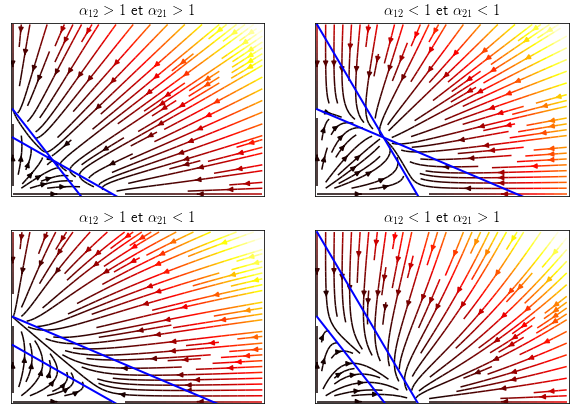

In [12]:
plt.figure(figsize=(10,7))
titles = [r"$\alpha_{12} > 1$ et $\alpha_{21} > 1$",r"$\alpha_{12} < 1$ et $\alpha_{21} < 1$",r"$\alpha_{12} > 1$ et $\alpha_{21} < 1$",r"$\alpha_{12} < 1$ et $\alpha_{21} > 1$"]
for k,(a1,a2) in enumerate(coeffs):    
    plt.subplot(2,2,k+1)
    plt.streamplot(X_grid, Y_grid, DX_grid[k,:], DY_grid[k,:], color=norm[k,:], cmap=plt.cm.hot)
    plt.plot(X_grid[0],1-a2*X_grid[0],'b',linewidth=2)
    plt.plot(X_grid[0],(1-X_grid[0])/a1,'b',linewidth=2)
    plt.title(titles[k],fontsize=15)
    plt.gca().set_ylim(-0.02,2.02), plt.gca().set_xlim(-0.02,2.52)
    plt.xticks(()), plt.yticks(())
plt.show()

# Numerical method for ODE

**benchmark problem** : systéme oscillant (pendule) sans friction

In [13]:
# initial condition
y0 = [2, 0]
# discretization
t = np.linspace(0, 5*pi, 100)
h = t[1] - t[0]

**problem formulation** : 
$$ y''(t) + y(t) = 0 $$

In [14]:
def problem(y, t):
    return np.array([y[1], -y[0]])

**Analytic solution** is :

$$ y(t) = y_0 \cos(t) $$

In [15]:
def exact_solution(t):
    return y0[0]*np.cos(t)

**Euler**



In [16]:
def Euler_method(f, y0, t):
    y    = np.zeros((len(t), len(y0)))
    y[0,:] = y0
    for i in range(len(t)-1):
        y[i+1] = y[i] + h*f(y[i], t[i])
    return y

**Runge Kutta - order 4**
$$ y_{n+1} = y_n + \frac{h}{6}(k_1+2k_2+k_4)$$
où:
- $k_1 = f(t_n,y_n)$
- $k_2 = f(t_n+h/2, y_n+h/2k_1)$
- $k_3 = f(t_n+h/2, y_n+h/2k_2)$
- $k_4 = f(t_n+h, y_n+hk_3)$

In [17]:
def RungeKutta4_method(f, y0, t):
    y    = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        k1 = f(y[i], t[i])
        k2 = f(y[i]+k1*h/2, t[i]+h/2)
        k3 = f(y[i]+k2*h/2, t[i]+h/2)
        k4 = f(y[i]+k3*h, t[i]+h)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

**resolution**

In [18]:
# exact solution
y_exact = exact_solution(t)
# numerical method
y_euler = Euler_method(problem, y0, t)[:, 0]
y_rk4   = RungeKutta4_method(problem, y0, t)[:, 0]

**display**

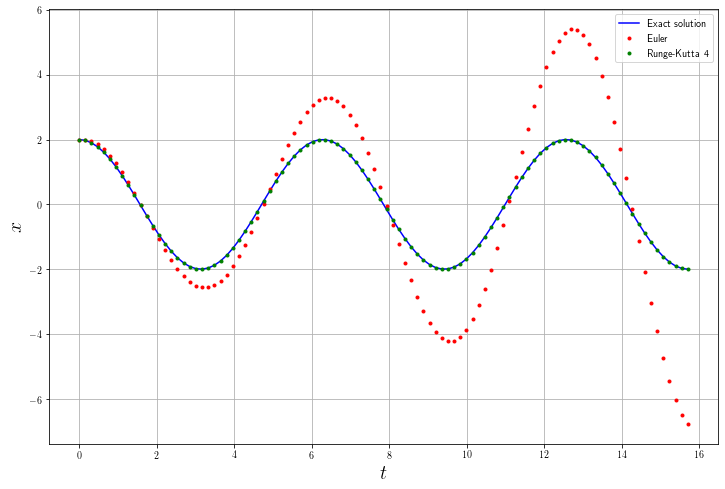

In [19]:
plt.figure(figsize=(12,8))
plt.plot(t, y_exact, 'b', label="Exact solution")
plt.plot(t, y_euler, ".r", label="Euler")
plt.plot(t, y_rk4, ".g", label="Runge-Kutta 4")
plt.grid(), plt.legend()
plt.xlabel("$t$", fontsize=20), plt.ylabel("$x$", fontsize=20)
plt.show()

**animation**

In [20]:
import matplotlib.animation as animation
from IPython.display import HTML, Image
from tqdm import tqdm
import time
%matplotlib notebook

In [137]:
y_euler, y_rk4, y_exact = [], [], []
errors_euler, errors_rk4 = [], []
time_euler, time_rk4 = [], []
times, hs = [], []
for N in tqdm(np.arange(50,400,20)):
    t = np.linspace(0, 5*pi, N)
    h = t[1] - t[0]
    # resolution method
    exact = exact_solution(t)
    start_euler = time.time()
    euler = Euler_method(problem, y0, t)[:, 0]
    end_euler = time.time()
    start_rk4 = time.time()
    rk4   = RungeKutta4_method(problem, y0, t)[:, 0]
    end_rk4 = time.time()
    # errors
    error_euler = np.abs(exact-euler).sum()
    error_rk4   = np.abs(exact-rk4).sum()
    # append
    y_exact.append(exact)
    y_euler.append(euler)
    y_rk4.append(rk4)
    errors_euler.append(error_euler)
    errors_rk4.append(error_rk4)
    times.append(t)
    hs.append(h)
    time_euler.append(end_euler - start_euler)
    time_rk4.append(end_rk4 - start_rk4)

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 103.72it/s]


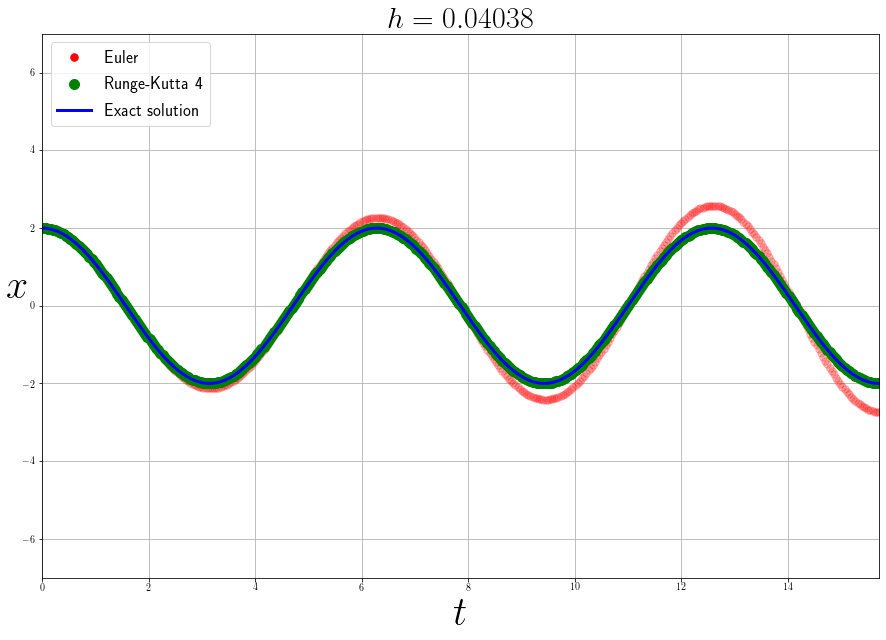

In [150]:
N = len(times)
fig, ax = plt.subplots(figsize=(15,10)) 
plt.grid()
plt.xlim(t.min(), t.max()), plt.ylim(-7, 7)
plt.xlabel("$t$",fontsize=40), plt.ylabel("$x$", fontsize=40, rotation=0)
line_euler, = plt.plot([],[],'r.', markersize=15, label="Euler")
line_rk4, = plt.plot([],[],'g.', markersize=20, label="Runge-Kutta 4")
def init():
    line_euler.set_data([],[])
    line_rk4.set_data([],[])
    return line_euler, line_rk4
def animate(i): 
    line_euler.set_data(times[i], y_euler[i])
    line_euler.set_alpha(1-0.8*i/N)
    line_rk4.set_data(times[i], y_rk4[i])
    ax.set_title('$h={:.5f}$'.format(hs[i]),fontsize=30)
    return line_euler,
plt.plot(t, y_exact[-1],'b', label="Exact solution", linewidth=3)
plt.legend(loc='upper left', fontsize=17)
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=N, blit=True, interval=1000, repeat=True)
# need ImageMagick
ani.save(r"animation.gif", writer='imagemagick')

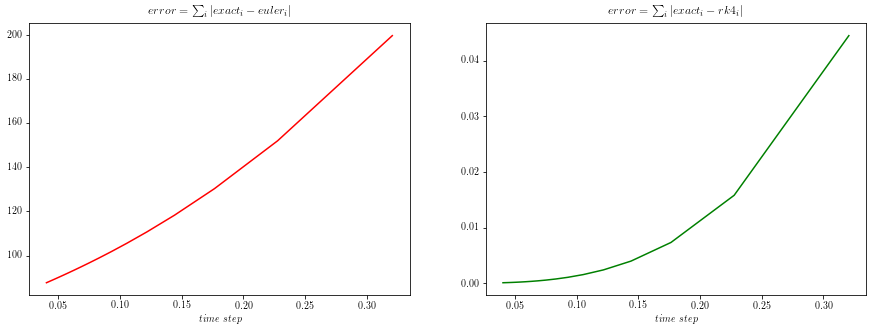

In [139]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.plot(hs, errors_euler, 'r'), plt.title("$EULER$")
plt.xlabel("$time\ step$"), plt.title('$error=\sum_i|exact_i-euler_i|$')
plt.subplot(122), plt.plot(hs, errors_rk4, 'g'), plt.title("$RK4$")
plt.xlabel("$time\ step$"), plt.title('$error=\sum_i|exact_i-rk4_i|$')
plt.show()

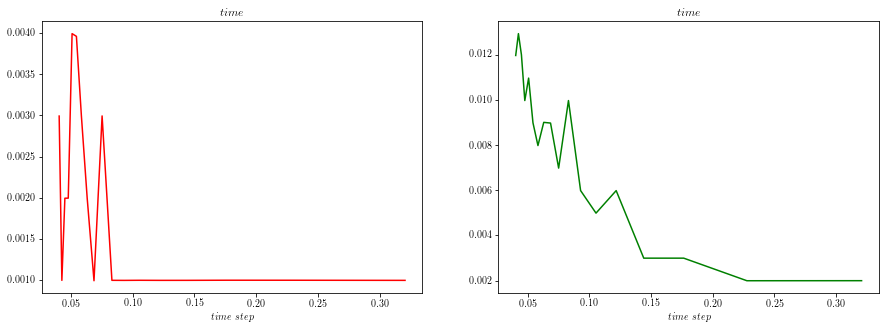

In [140]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.plot(hs, time_euler, 'r'), plt.title("$EULER$")
plt.xlabel("$time\ step$"), plt.title('$time$')
plt.subplot(122), plt.plot(hs, time_rk4, 'g'), plt.title("$RK4$")
plt.xlabel("$time\ step$"), plt.title('$time$')
plt.show()